# Getting the Cleaned Data for Exploratory Data Analysis

In [13]:
#Getting Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [48]:
#reading Data
raw_data = pd.read_csv('../data/raw/Data Cleaning.csv')
y_data = pd.read_excel('../data/raw/Training outputs.xlsx')
for i in raw_data['Unnamed: 0']:
    raw_data['Unnamed: 0'][i] = 'Wafer-' + str(i) 
print(raw_data)
print(y_data)
load_data=pd.merge(raw_data, y_data, on='Unnamed: 0')

C:\ProgramData\Anaconda3\envs\opencv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



      Unnamed: 0  Sensor-1  Sensor-2   Sensor-3   Sensor-4  Sensor-5  \
0        Wafer-0   2988.30   2519.05  2208.8556  1157.7224    1.5509   
1        Wafer-1   2987.32   2528.81  2171.8556   940.9917    0.8579   
2        Wafer-2   2908.11   2481.85  2207.3889   962.5317    1.2043   
3        Wafer-3   3002.27   2497.45  2207.3889   962.5317    1.2043   
4        Wafer-4   3010.41   2632.80  2203.9000  1116.4129    1.2639   
...          ...       ...       ...        ...        ...       ...   
1532  Wafer-1532   2899.41   2464.36  2179.7333  3085.3781    1.4843   
1533  Wafer-1533   3052.31   2522.55  2198.5667  1124.6595    0.8763   
1534  Wafer-1534   2978.81   2379.78  2206.3000  1110.4967    0.8236   
1535  Wafer-1535   2894.92   2532.01  2177.0333  1183.7287    1.5726   
1536  Wafer-1536   2944.92   2450.76  2195.4444  2914.1792    1.5978   

      Sensor-7  Sensor-8  Sensor-9  Sensor-10  ...  Sensor-581  Sensor-582  \
0     107.8022    0.1233    1.5362    -0.0259  ...      0

In [15]:
#Get a glimpse of Data
raw_data.head()
y_data['Good/Bad']

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
1532   -1
1533   -1
1534   -1
1535   -1
1536   -1
Name: Good/Bad, Length: 1537, dtype: int64

In [16]:
#Generate descriptive statistics that summarize the central tendency, dispersion and shape of a 
#dataset's distribution, excluding ``NaN`` values.
raw_data.describe()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
count,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,...,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000
mean,768.000000,3014.606831,2495.503064,2200.110458,1396.614392,4.224715,101.015871,0.122448,1.461884,-0.000846,...,0.004339,44.622110,0.500104,0.015027,0.003782,3.007246,0.021432,0.016414,0.005268,101.447126
std,443.837996,74.065145,80.312452,29.451821,442.779714,56.647650,6.258092,0.001909,0.074033,0.015025,...,0.002095,69.486486,0.003356,0.012696,0.002733,2.640841,0.012398,0.008768,0.002865,93.485114
min,0.000000,2743.240000,2158.750000,2060.660000,711.025800,0.681500,82.131100,0.116000,1.191000,-0.053400,...,0.001000,10.942500,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,10.942500
25%,384.000000,2966.260000,2452.520000,2180.700000,1081.566200,1.009600,97.720000,0.121100,1.410300,-0.010800,...,0.003700,10.942500,0.497900,0.011600,0.003100,2.309900,0.013400,0.010600,0.003300,45.964100
50%,768.000000,3011.820000,2499.350000,2200.733300,1283.436800,1.310100,101.457800,0.122400,1.460400,-0.001400,...,0.003700,10.942500,0.500100,0.013800,0.003600,2.757700,0.020700,0.014800,0.004600,73.865700
75%,1152.000000,3057.310000,2538.430000,2217.866700,1591.223500,1.529100,104.521100,0.123800,1.516400,0.008300,...,0.003800,54.476100,0.502300,0.016500,0.004100,3.295400,0.027600,0.020300,0.006400,115.100500
max,1536.000000,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.471400,0.103900,98.662800,0.102800,0.079900,0.028600,737.304800


#Observation from Describe() functions
#1. <b>Count:</b> It displays total number of records which has actual value without NaN. This NaN values can be replaced with Mean, Median, Mode, Average Value
#2. <b>Mean:</b>Tells the average value of the data
#3. <b>std:</b>Standard deviation is a number used to tell how measurements for a group are spread out from the average (mean), or expected value
#4. <b>Min:</b> Check for minimum values for a particular column, if data is having minimum values as zero, then there is no value of it and should be replaced with some value.


#4. Min: Check for minimum values for a particular column, if data is having minimum values as zero, then there is no value of it and should be replaced with some value.

In [17]:
#Knowning Number of Rows and Columns
raw_data.shape

(1537, 475)

<b>Normalisation</b><p>
One method utilised to bring all the variables to a more homogeneous scale is normalisation. Normalisation is synonym of centering the distribution. This means subtracting the mean of the variable to each observation. This procedure will "center" the new distribution at zero (the new mean of the variable will now be zero).

<b>Standarisation</b><p>
Standarisation is also used to bring all the variables to a similar scale. Standarisation means centering the variable at zero, and standarising the variance at 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:

z = (x - x_mean) / std

In [18]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(raw_data,
                                                    y_data['Good/Bad'], test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1075, 475), (462, 475))

In [19]:
# standarisation: we use the StandardScaler from sklearn
y_data['Good/Bad']
scaler = StandardScaler() # create an object
X_train_scaled = scaler.fit_transform(X_train) # fit the scaler to the train set, and then transform it
X_test_scaled = scaler.transform(X_test) # transform the test set

<h4>Major Clustering Approaches</h4><p>
• <b>Partitioning algorithms:</b> Construct various partitions and then
evaluate them by some criterion<p>
• <b>Hierarchy algorithms:</b> Create a hierarchical decomposition of the
set of data (or objects) using some criterion<p>
• <b>Density-based:</b> based on connectivity and density functions<p>
• <b>Grid-based:</b> based on a multiple-level granularity structure<p>
• <b>Model-based:</b> A model is hypothesized for each of the clusters and
the idea is to find the best fit of that model to each other<p>

In [21]:
a = np.asarray(X_train_scaled)
np.savetxt("../data/raw/X_train_scaled.csv", a, delimiter=",")
b = np.asarray(X_test_scaled)
np.savetxt("../data/raw/X_test_scaled.csv", b, delimiter=",")

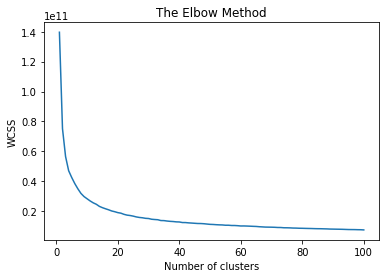

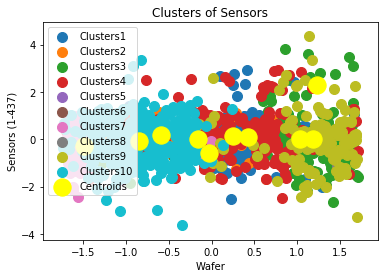

In [30]:
from sklearn.cluster import KMeans
wcss = []
clusters = []
for i in range(1, 101):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(raw_data)
    wcss.append(kmeans.inertia_)
    clusters.append('Clusters'+str(i))
plt.plot(range(1, 101), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_train_scaled)
c = np.asarray(y_kmeans)
np.savetxt("../data/raw/y_kmeans.csv", c, delimiter=",")

# Visualising the clusters
for i in range(1, 11):
    plt.scatter(X_train_scaled[y_kmeans == i-1, 0], X_train_scaled[y_kmeans == i-1, 1], s = 100, label = clusters[i-1])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Sensors')
plt.xlabel('Wafer')
plt.ylabel('Sensors (1-437)')
plt.legend()
plt.show()

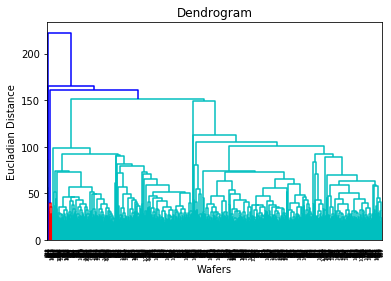

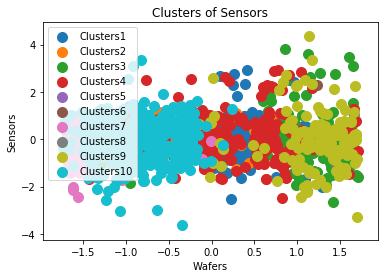

In [33]:

# Using the Dendogram to find optimum number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_train_scaled,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wafers')
plt.ylabel('Eucladian Distance')
plt.show()

#Fitting heirarchical clustering class to mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_train_scaled)

#Visualizing the Clusters
for i in range(1, 11):
    plt.scatter(X_train_scaled[y_kmeans == i-1, 0], X_train_scaled[y_kmeans == i-1, 1], s = 100, label = clusters[i-1])

plt.title('Clusters of Sensors')
plt.xlabel('Wafers')
plt.ylabel('Sensors')
plt.legend()
plt.show()

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import DBSCAN
data = raw_data
max_distance = 0.1
db = DBSCAN(eps=max_distance, min_samples=10).fit(X_train)
print(db.labels_)
print(db.core_sample_indices_)
# Extract a mask of core cluster members
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
# Extract labels (-1 is used for outliers)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)

# Plot up the results!
min_x = np.min(X_train[:, 0])
max_x = np.max(X_train[:, 0])
min_y = np.min(y_train[:, 1])
max_y = np.max(y_train[:, 1])

fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(X_train[:,0], y_train[:,1], 'ko')
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title('Original Data', fontsize = 20)

plt.subplot(122)
# The following is just a fancy way of plotting core, edge and outliers
# Credit to: http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_train[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = y_train[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title('DBSCAN: %d clusters found' % n_clusters, fontsize = 20)
fig.tight_layout()
plt.subplots_adjust(left=0.03, right=0.98, top=0.9, bottom=0.05)

[-1 -1 -1 ... -1 -1 -1]
[]


TypeError: '(slice(None, None, None), 0)' is an invalid key

In [ ]:
# initializing the pca
from sklearn import decomposition
import seaborn as sn
pca = decomposition.PCA()
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(X_train_scaled)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA for dimensionality redcution (non-visualization)

pca.n_components = 479
pca_data = pca.fit_transform(new_raw_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

In [ ]:
# TSNE

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = X_train_scaled
labels_1000 = X_train_scaled

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [ ]:
raw_data